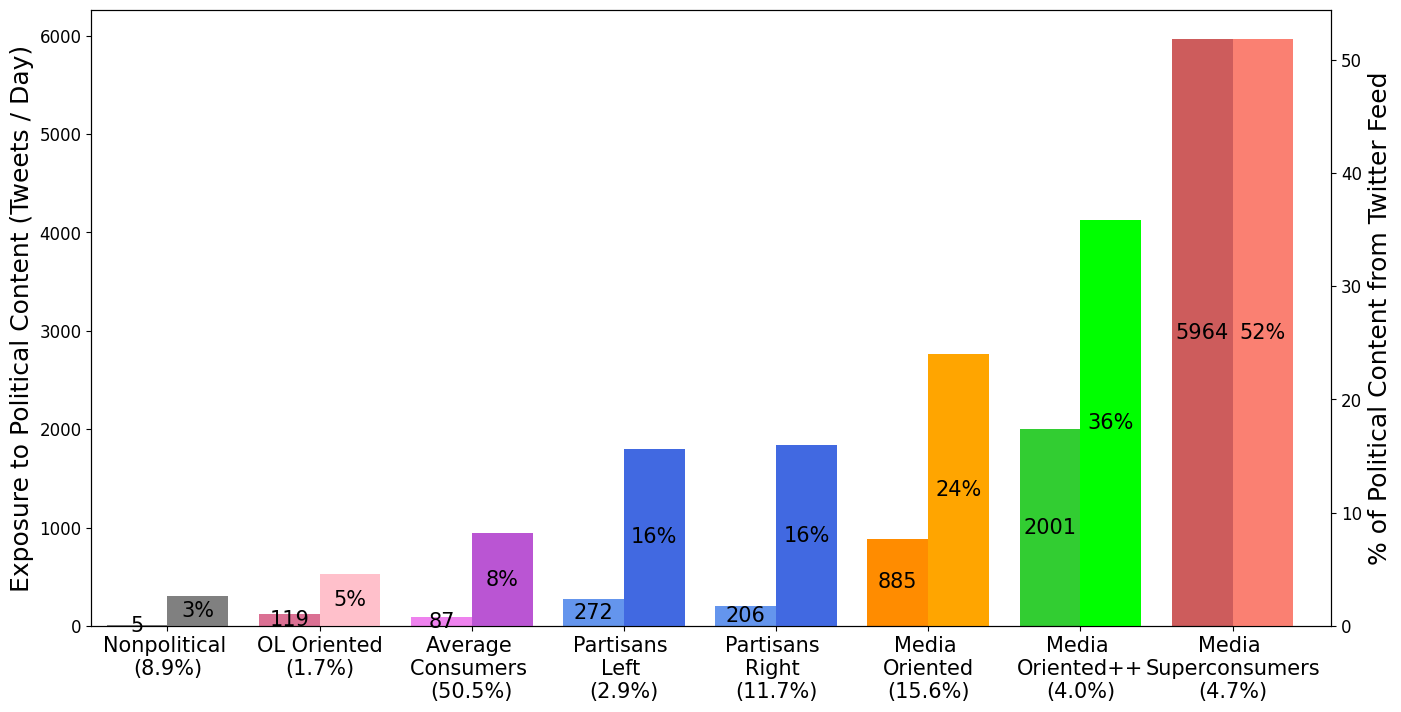

In [1]:
#==============================================================================
# 01-fig01-political-exposure-types
# Purpose: to replicate Figure 1 of the paper, in which we show the potential political
#          exposure across the prototypical modes of exposure (i.e., the percentage and
#          number of political tweets among the different prototypical clusters found).
# Article: "Who is Curating My Feed? Characterizing Political Exposure of
#          Registered U.S. Voters on Twitter"
# Year:    2022
# Authors: Assaf Shamir, Jennifer Oser, Nir Grinberg
#==============================================================================

import pandas as pd
import matplotlib.pyplot as plt


data1 = pd.read_csv("../data/01-fig01-political-exposure-magnitude.csv")
data2 = pd.read_csv("../data/01-fig01-political-exposure-percentage.csv")

rename_detailed_dict = {
    0:"Nonpolitical \n(8.9%)",
    1:"OL Oriented\n(1.7%)",
    2:"Average \nConsumers \n(50.5%)",
    3.1:"Partisans \nLeft \n(2.9%)",
    3.2:"Partisans \nRight \n(11.7%)",
    4:"Media \nOriented\n(15.6%)",
    5:"Media \nOriented++\n(4.0%)",
    6:"Media \nSuperconsumers\n(4.7%)",
}

detailed_cluster_labels = list(rename_detailed_dict.values())

colors1 = ['grey','palevioletred','violet', 'cornflowerblue','cornflowerblue', 'darkorange', 'limegreen', 'indianred']
colors2 = ['grey', 'pink','mediumorchid', 'royalblue','royalblue', 'orange', 'lime','salmon']

c_y1 = colors1
c_y2 = colors2
ispercent_y1 = False
ispercent_y2 = True
y1_title = "Exposure to Political Content (Tweets / Day)"
y2_title = "% of Political Content from Twitter Feed"
xlabel_title = "Cluster"
remove_legend = True
width = 0.4
add_barlabels = True
barlabel_fontsize = 15
fz_big = 18
fz_small = 12
fig_size = (16,8)
xticklabels = detailed_cluster_labels
xtickrotation = 0

fig = plt.figure(figsize=fig_size)

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1 = data1.plot(kind="bar", y="p_tweets", stacked=True, figsize=fig_size, color=c_y1, ax=ax1, width=width, position=1)
ax2 = data2.plot(kind="bar", y="p_tweets_frac", stacked=True, figsize=fig_size, color=c_y2, ax=ax2, width=width, position=0)

if add_barlabels:
    for i, container in enumerate(ax1.containers):
        ax1.bar_label(container, fmt=("%.0f"+("%%" if ispercent_y1 else "")), label_type="center", fontsize=barlabel_fontsize)

    for i, container in enumerate(ax2.containers):
        ax2.bar_label(container, fmt=('%.0f'+("%%" if ispercent_y2 else "")), label_type="center", fontsize=barlabel_fontsize)

ax1.grid(False)
ax2.grid(False)

ax1.tick_params(axis='x', which='major', labelsize=15)

ax1.tick_params(axis='y', which='major', labelsize=fz_small)
ax2.tick_params(axis='y', which='major', labelsize=fz_small)

ax1.set_xlim((-0.5, None))

if xticklabels:
    ax1.set_xticklabels(xticklabels, rotation = xtickrotation)
    ax2.set_xticklabels(xticklabels, rotation = xtickrotation)

ax1.set_xlabel("")
ax1.set_ylabel(y1_title, fontsize=fz_big)
ax2.set_ylabel(y2_title, fontsize=fz_big)

ax1.get_legend().remove()
ax2.get_legend().remove()

plt.show()